Validation Height in Tapajos (Santarem): Log-Norm probability density LPJmL-FIT vs. Inventory data

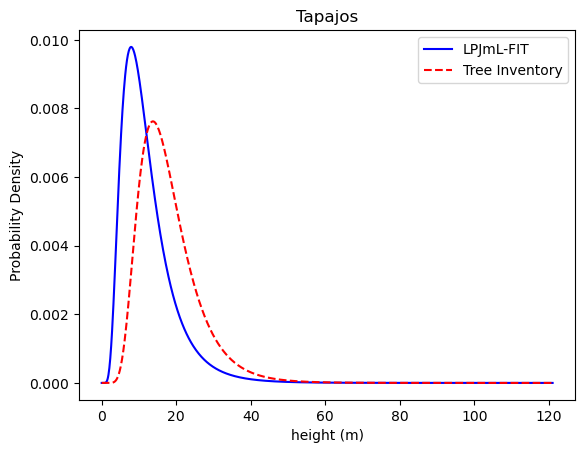

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
import xarray as xr
from scipy.integrate import simps

# Set path to model output and validation file
path_validation = '//clusterfs/biodiversity/annavo/validation_data/height_tapajos.csv'
path_model = '//clusterfs/biodiversity/annavo/LPJmL56Fit/tapajos_none_shuffle_leaftresh3_constc1996/output/height_ind.nc'
selected_column_index = 0  # Replace with the index of the desired column from the CSV validation file

# Read the CSV validation file and extract the desired column
df_validation = pd.read_csv(path_validation, sep=',', decimal='.')
data_validation = df_validation.iloc[:, selected_column_index].values

# Convert the data to numeric values and remove rows with NaN values
data_validation = pd.to_numeric(data_validation, errors='coerce')  # Invalid values will be converted to NaN
data_validation = data_validation[~np.isnan(data_validation)]

# Read data from the model output
ds_model = xr.open_dataset(path_model)
ds_last30years = ds_model.sel(time=slice('1981', '2011'))
ds_mean_last30years = ds_last30years['num_height'].mean(dim='time')

# Convert data to mm²/g and round to the nearest integer
ds_mean_last30years = ds_mean_last30years * 800 # multiply by number of patches calculated in simulation run to receive information for entire grid cell
ds_mean_last30years = ds_mean_last30years.astype(int)

# Create an array of SLA values from the model data
data_array = []
bin_width = 1.010101 # manually read binwidth from netcdf file and scaled to receive proper unit

for i, value in enumerate(ds_mean_last30years.values):
    height_value = ds_last30years['height'][i].values 
    num_height_value = int(value)
    # only consider trees as big as the smallest tree in the inventory
    if height_value > 5.5:
        for _ in range(num_height_value):
            variation = np.random.uniform(-bin_width / 2, bin_width / 2) # randomly add / subtract half of binwidth to receive distinct values instead of range
            data_array.append(height_value + variation)

data_array = np.array(data_array)

# Assign values exceeding the highest bin to the highest bin
data_validation[data_validation > max(data_array)] = max(data_array)

# Calculate parameters for Log-Normal distribution from model data
sigma_model, loc_model, scale_model = lognorm.fit(data_array, floc=0)
mu_model = np.log(scale_model)
E_model = np.exp(mu_model + (sigma_model ** 2 / 2))

# Create an x-axis grid for the plot
x = np.linspace(0, np.ceil(max(data_array) * 1.2), 1000)

# Calculate the Log-Normal PDF using mean and standard deviation from model data
pdf_model = lognorm.pdf(x, sigma_model, loc=0, scale=np.exp(mu_model))

# Normalize the PDF so that the area under the curve is equal to 1
pdf_model /= pdf_model.sum()

# Create the plot for log-normal PDF from model data
plt.plot(x, pdf_model, color='b', linestyle='-', label='LPJmL-FIT')

# Calculate parameters for Log-Normal distribution from validation data
sigma_validation, loc_validation, scale_validation = lognorm.fit(data_validation, floc=0)
mu_validation = np.log(scale_validation)
E_validation = np.exp(mu_validation + (sigma_validation ** 2 / 2))

# Calculate the PDF for the log-normal distribution from validation data
pdf_validation = lognorm.pdf(x, sigma_validation, loc=0, scale=scale_validation)

# Normalize the PDF so that the area under the curve is equal to 1
pdf_validation /= pdf_validation.sum()


# Create the plot for log-normal PDF from the CSV validation data
plt.plot(x, pdf_validation, color='r', linestyle='--', label='Tree Inventory')

# Set title and legend for the plot
plt.title('Tapajos')
plt.legend()

# Set axis labels for the plot
plt.xlabel('height (m)')
plt.ylabel('Probability Density')

# Display the plot
plt.show()


Validation Height in Tapajos (Santarem): Histogram LPJmL-FIT vs. Inventory data

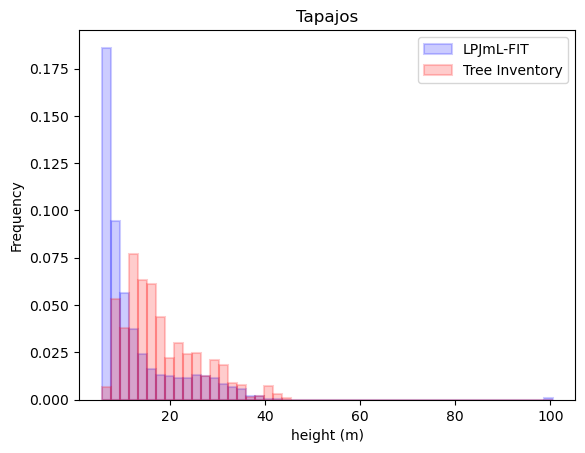

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
import xarray as xr

# Set path to model output and validation file
path_validation = '//clusterfs/biodiversity/annavo/validation_data/height_tapajos.csv'
path_model = '//clusterfs/biodiversity/annavo/LPJmL56Fit/tapajos_none_shuffle_leaftresh3_constc1996/output/height_ind.nc'
selected_column_index = 0  # Replace with the index of the desired column from the CSV validation file

# Read the CSV validation file and extract the desired column
df_validation = pd.read_csv(path_validation, sep=',', decimal='.')
data_validation = df_validation.iloc[:, selected_column_index].values

# Convert the data to numeric values and remove rows with NaN values
data_validation = pd.to_numeric(data_validation, errors='coerce')  # Invalid values will be converted to NaN
data_validation = data_validation[~np.isnan(data_validation)]

# Read data from the model output
ds_model = xr.open_dataset(path_model)
ds_last30years = ds_model.sel(time=slice('1981', '2011'))
ds_mean_last30years = ds_last30years['num_height'].mean(dim='time')

# Convert data to mm²/g and round to the nearest integer
ds_mean_last30years = ds_mean_last30years * 800 # multiply by number of patches calculated in simulation run to receive information for entire grid cell
ds_mean_last30years = ds_mean_last30years.astype(int)

# Create an array of SLA values from the model data
data_array = []
bin_width = 1.010101 # manually read binwidth from netcdf file and scaled to receive proper unit

for i, value in enumerate(ds_mean_last30years.values):
    height_value = ds_last30years['height'][i].values 
    num_height_value = int(value)

    # only consider trees as big as the smallest tree in the inventory
    if height_value > 5.5:
        for _ in range(num_height_value):
            variation = np.random.uniform(-bin_width / 2, bin_width / 2) # randomly add / subtract half of binwidth to receive distinct values instead of range
            data_array.append(height_value + variation)

data_array = np.array(data_array)

# Assign values exceeding the highest bin to the highest bin
data_validation[data_validation > max(data_array)] = max(data_array)

# Calculate the histogram for LPJmL-FIT data and obtain the bins
hist_model, bins_model, _ = plt.hist(data_array, bins=50, color='b', alpha=0.2, density=True, label='LPJmL-FIT', edgecolor='b', linewidth=1.5)

# Create the plot for the data from the CSV validation using the same bins as LPJmL-FIT
hist_validation, _, _ = plt.hist(data_validation, bins=bins_model, color='r', alpha=0.2, density=True, label='Tree Inventory', edgecolor='r', linewidth=1.5)

# Normalize the histograms
bin_width_model = bins_model[1] - bins_model[0]
area_model = np.sum(hist_model) * bin_width_model
area_validation = np.sum(hist_validation) * bin_width_model
hist_model /= area_model
hist_validation /= area_validation

# Set title and legend for the plot
plt.title('Tapajos')
plt.legend()

# Set axis labels for the plot
plt.xlabel('height (m)')
plt.ylabel('Frequency')

# Display the plot
plt.show()


Validation diameter at breast height in Tapajos (Santarem): Log-Norm probability density LPJmL-FIT vs. Inventory data

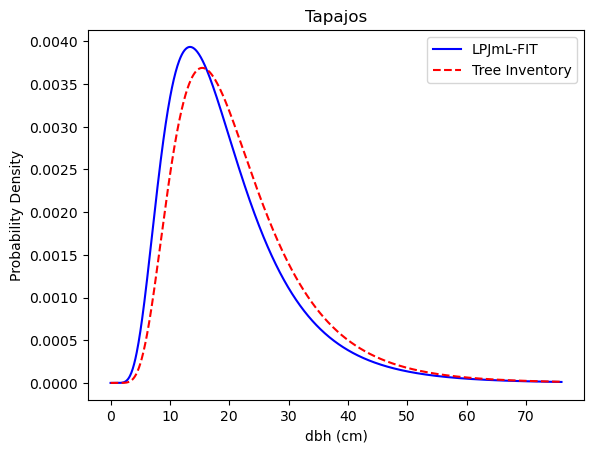

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
import xarray as xr
from scipy.integrate import simps

# Declare allometry constants
allom1 = 250
allom2 = 40
allom3 = 0.67

# Define function to compute dbh from height
def dbh_from_height(height):
    stemdiam = (height / allom2) ** (1.0 / allom3)
    return stemdiam

# Set path to model output and validation file
path_validation = '//clusterfs/biodiversity/annavo/validation_data/dbh_tapajos.csv'
path_model = '//clusterfs/biodiversity/annavo/LPJmL56Fit/tapajos_none_shuffle_leaftresh3_constc1996/output/height_ind.nc'
selected_column_index = 0  # Replace with the index of the desired column from the CSV validation file

# Read the CSV validation file and extract the desired column
df_validation = pd.read_csv(path_validation, header = None,sep=',', decimal='.')
data_validation = df_validation.iloc[:, selected_column_index].values

# Convert the data to numeric values and remove rows with NaN values
data_validation = pd.to_numeric(data_validation, errors='coerce')  # Invalid values will be converted to NaN
data_validation = data_validation[~np.isnan(data_validation)]

# Read data from the model output
ds_model = xr.open_dataset(path_model)
ds_last30years = ds_model.sel(time=slice('1981', '2011'))
ds_mean_last30years = ds_last30years['num_height'].mean(dim='time')

# Convert data to mm²/g and round to the nearest integer
ds_mean_last30years = ds_mean_last30years * 800 # multiply by number of patches calculated in simulation run to receive information for entire grid cell
ds_mean_last30years = dbh_from_height(ds_mean_last30years)

ds_mean_last30years = ds_mean_last30years.astype(int)

# Create an array of SLA values from the model data
data_array = []
bin_width = dbh_from_height(1.010101) # manually read binwidth from netcdf file and scaled with dbh_from_height function to receive proper unit

for i, value in enumerate(ds_mean_last30years.values):
    dbh_value = dbh_from_height(ds_last30years['height'][i].values) * 100 # from m to cm
    num_dbh_value = int(value)
    
    # only consider trees as big as the smallest tree in the inventory
    if dbh_value > 10:
        for _ in range(num_dbh_value):
            variation = np.random.uniform(-bin_width / 2, bin_width / 2) # randomly add / subtract half of binwidth to receive distinct values instead of range
            data_array.append(dbh_value + variation)

data_array = np.array(data_array)

# Assign values exceeding the highest bin to the highest bin
data_validation[data_validation > max(data_array)] = max(data_array)

# Calculate parameters for Log-Normal distribution from model data
sigma_model, loc_model, scale_model = lognorm.fit(data_array, floc=0)
mu_model = np.log(scale_model)
E_model = np.exp(mu_model + (sigma_model ** 2 / 2))

# Create an x-axis grid for the plot
x = np.linspace(0, np.ceil(max(data_array) * 1.2), 1000)

# Calculate the Log-Normal PDF using mean and standard deviation from model data
pdf_model = lognorm.pdf(x, sigma_model, loc=0, scale=np.exp(mu_model))

# Normalize the PDF so that the area under the curve is equal to 1
pdf_model /= pdf_model.sum()

# Create the plot for log-normal PDF from model data
plt.plot(x, pdf_model, color='b', linestyle='-', label='LPJmL-FIT')

# Calculate parameters for Log-Normal distribution from validation data
sigma_validation, loc_validation, scale_validation = lognorm.fit(data_validation, floc=0)
mu_validation = np.log(scale_validation)
E_validation = np.exp(mu_validation + (sigma_validation ** 2 / 2))

# Calculate the PDF for the log-normal distribution from validation data
pdf_validation = lognorm.pdf(x, sigma_validation, loc=0, scale=scale_validation)

# Normalize the PDF so that the area under the curve is equal to 1
pdf_validation /= pdf_validation.sum()


# Create the plot for log-normal PDF from the CSV validation data
plt.plot(x, pdf_validation, color='r', linestyle='--', label='Tree Inventory')

# Set title and legend for the plot
plt.title('Tapajos')
plt.legend()

# Set axis labels for the plot
plt.xlabel('dbh (cm)')
plt.ylabel('Probability Density')

# Display the plot
plt.show()

Validation diameter at breast height in Tapajos (Santarem): Histogram LPJmL-FIT vs. Inventory data

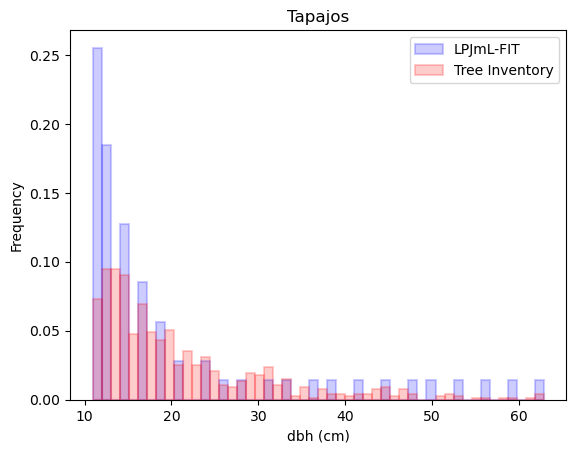

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Declare allometry constants
allom1 = 250
allom2 = 40
allom3 = 0.67

# Define function to compute dbh from height
def dbh_from_height(height):
    stemdiam = (height / allom2) ** (1.0 / allom3)
    return stemdiam

# Set path to model output and validation file
path_validation = '//clusterfs/biodiversity/annavo/validation_data/dbh_tapajos.csv'
path_model = '//clusterfs/biodiversity/annavo/LPJmL56Fit/tapajos_none_shuffle_leaftresh3_constc1996/output/height_ind.nc'

selected_column_index = 0  # Replace with the index of the desired column from the CSV validation file

# Read the CSV validation file and extract the desired column
df_validation = pd.read_csv(path_validation, header=None, sep=',', decimal='.')
data_validation = df_validation.iloc[:, selected_column_index].values

# Convert the data to numeric values and remove rows with NaN values
data_validation = pd.to_numeric(data_validation, errors='coerce')  # Invalid values will be converted to NaN
data_validation = data_validation[~np.isnan(data_validation)]

# Read data from the model output
ds_model = xr.open_dataset(path_model)
ds_last30years = ds_model.sel(time=slice('1981', '2011'))
ds_mean_last30years = ds_last30years['num_height'].mean(dim='time')

ds_mean_last30years = ds_mean_last30years * 800 # multiply by number of patches calculated in simulation run to receive information for entire grid cell
ds_mean_last30years = dbh_from_height(ds_mean_last30years)
ds_mean_last30years = ds_mean_last30years.astype(int)

# Create an array of SLA values from the model data
data_array = []
bin_width = dbh_from_height(1.010101) # manually read binwidth from netcdf file and scaled with dbh_from_height function to receive proper unit

for i, value in enumerate(ds_mean_last30years.values):
    dbh_value = dbh_from_height(ds_last30years['height'][i].values) * 100 # from m to cm
    num_dbh_value = int(value)
    
    # only consider trees as big as the smallest tree in the inventory
    if dbh_value > 10:
        for _ in range(num_dbh_value):
            variation = np.random.uniform(-bin_width / 2, bin_width / 2) # randomly add / subtract half of binwidth to receive distinct values instead of range
            data_array.append(dbh_value + variation)

data_array = np.array(data_array)

# Assign values exceeding the highest bin to the highest bin
#data_validation[data_validation > max(data_array)] = max(data_array)

# Calculate the histogram for LPJmL-FIT data and obtain the bins
hist_model, bins_model, _ = plt.hist(data_array, bins=50, color='b', alpha=0.2, density=True, label='LPJmL-FIT', edgecolor='b', linewidth=1.5)

# Create the plot for the data from the CSV validation using the same bins as LPJmL-FIT
hist_validation, _, _ = plt.hist(data_validation, bins=bins_model, color='r', alpha=0.2, density=True, label='Tree Inventory', edgecolor='r', linewidth=1.5)

# Normalize the histograms
bin_width_model = bins_model[1] - bins_model[0]
area_model = np.sum(hist_model) * bin_width_model
area_validation = np.sum(hist_validation) * bin_width_model
hist_model /= area_model
hist_validation /= area_validation

# Set title and legend for the plot
plt.title('Tapajos')
plt.legend()

# Set axis labels for the plot
plt.xlabel('dbh (cm)')
plt.ylabel('Frequency')

# Display the plot
plt.show()


Validation diameter at breast height in Paracou (Guyaflux): Log-Norm probability density LPJmL-FIT vs. Inventory data

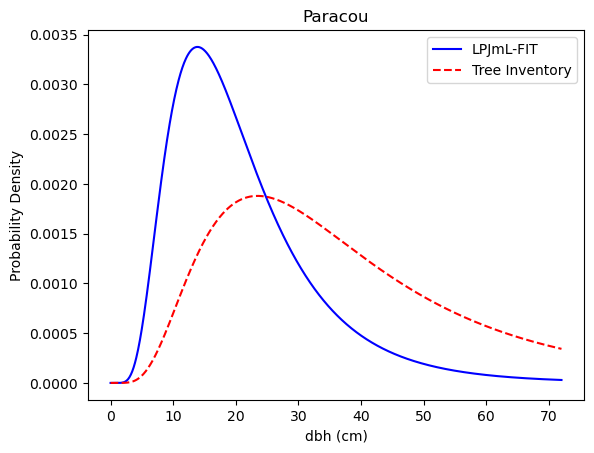

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
import xarray as xr
from scipy.integrate import simps


# Declare allometry constants
allom1 = 250
allom2 = 40
allom3 = 0.67

# Define function to compute dbh from height
def dbh_from_height(height):
    stemdiam = (height / allom2) ** (1.0 / allom3)
    return stemdiam

# Set path to model output and validation file
path_validation = '//clusterfs/biodiversity/annavo/validation_data/dbh_paracou_2010_T0.csv'
path_model = '//clusterfs/biodiversity/annavo/LPJmL56Fit/paracou_none_shuffle_leaftresh3_constc1996/output/height_ind.nc'
selected_column_index = 0  # Replace with the index of the desired column from the CSV validation file

# Read the CSV validation file and extract the desired column
df_validation = pd.read_csv(path_validation, header = None,sep=',', decimal='.')
data_validation = df_validation.iloc[:, selected_column_index].values

# Convert the data to numeric values and remove rows with NaN values
data_validation = pd.to_numeric(data_validation, errors='coerce')  # Invalid values will be converted to NaN
data_validation = data_validation[~np.isnan(data_validation)]

# Read data from the model output
ds_model = xr.open_dataset(path_model)
ds_last30years = ds_model.sel(time=slice('1981', '2011'))
ds_mean_last30years = ds_last30years['num_height'].mean(dim='time')

# Convert data to mm²/g and round to the nearest integer
ds_mean_last30years = ds_mean_last30years * 800 # multiply by number of patches calculated in simulation run to receive information for entire grid cell
ds_mean_last30years = dbh_from_height(ds_mean_last30years)

ds_mean_last30years = ds_mean_last30years.astype(int)

# Create an array of SLA values from the model data
data_array = []
bin_width = dbh_from_height(1.010101) # manually read binwidth from netcdf file and scaled with dbh_from_height function to receive proper unit

for i, value in enumerate(ds_mean_last30years.values):
    dbh_value = dbh_from_height(ds_last30years['height'][i].values) * 100 # from m to cm
    num_dbh_value = int(value)
    
    # only consider trees as big as the smallest tree in the inventory
    if dbh_value > 10:
        for _ in range(num_dbh_value):
            variation = np.random.uniform(-bin_width / 2, bin_width / 2) # randomly add / subtract half of binwidth to receive distinct values instead of range
            data_array.append(dbh_value + variation)

data_array = np.array(data_array)

# Assign values exceeding the highest bin to the highest bin
data_validation[data_validation > max(data_array)] = max(data_array)

# Calculate parameters for Log-Normal distribution from model data
sigma_model, loc_model, scale_model = lognorm.fit(data_array, floc=0)
mu_model = np.log(scale_model)
E_model = np.exp(mu_model + (sigma_model ** 2 / 2))

# Create an x-axis grid for the plot
x = np.linspace(0, np.ceil(max(data_array) * 1.2), 1000)

# Calculate the Log-Normal PDF using mean and standard deviation from model data
pdf_model = lognorm.pdf(x, sigma_model, loc=0, scale=np.exp(mu_model))

# Normalize the PDF so that the area under the curve is equal to 1
pdf_model /= pdf_model.sum()

# Create the plot for log-normal PDF from model data
plt.plot(x, pdf_model, color='b', linestyle='-', label='LPJmL-FIT')

# Calculate parameters for Log-Normal distribution from validation data
sigma_validation, loc_validation, scale_validation = lognorm.fit(data_validation, floc=0)
mu_validation = np.log(scale_validation)
E_validation = np.exp(mu_validation + (sigma_validation ** 2 / 2))

# Calculate the PDF for the log-normal distribution from validation data
pdf_validation = lognorm.pdf(x, sigma_validation, loc=0, scale=scale_validation)

# Normalize the PDF so that the area under the curve is equal to 1
pdf_validation /= pdf_validation.sum()


# Create the plot for log-normal PDF from the CSV validation data
plt.plot(x, pdf_validation, color='r', linestyle='--', label='Tree Inventory')

# Set title and legend for the plot
plt.title('Paracou')
plt.legend()

# Set axis labels for the plot
plt.xlabel('dbh (cm)')
plt.ylabel('Probability Density')

# Display the plot
plt.show()

Validation diameter at breast height in Paracou (Guyaflux): Histogram LPJmL-FIT vs. Inventory data

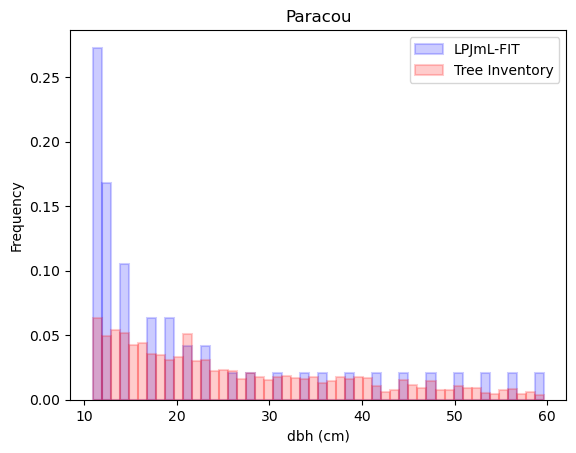

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Declare allometry constants
allom1 = 250
allom2 = 40
allom3 = 0.67

# Define function to compute dbh from height
def dbh_from_height(height):
    stemdiam = (height / allom2) ** (1.0 / allom3)
    return stemdiam

# Set path to input and output files
path_validation = '//clusterfs/biodiversity/annavo/validation_data/dbh_paracou_2010_T0.csv'
path_model = '//clusterfs/biodiversity/annavo/LPJmL56Fit/paracou_none_shuffle_leaftresh3_constc1996/output/height_ind.nc'

selected_column_index = 0  # Replace with the index of the desired column from the CSV validation file

# Read the CSV validation file and extract the desired column
df_validation = pd.read_csv(path_validation, header=None, sep=',', decimal='.')
data_validation = df_validation.iloc[:, selected_column_index].values

# Convert the data to numeric values and remove rows with NaN values
data_validation = pd.to_numeric(data_validation, errors='coerce')  # Invalid values will be converted to NaN
data_validation = data_validation[~np.isnan(data_validation)]

# Read data from the model output
ds_model = xr.open_dataset(path_model)
ds_last30years = ds_model.sel(time=slice('1981', '2011'))
ds_mean_last30years = ds_last30years['num_height'].mean(dim='time')

ds_mean_last30years = ds_mean_last30years * 800 # multiply by number of patches calculated in simulation run to receive information for entire grid cell
ds_mean_last30years = dbh_from_height(ds_mean_last30years)
ds_mean_last30years = ds_mean_last30years.astype(int)

# Create an array of SLA values from the model data
data_array = []
bin_width = dbh_from_height(1.010101) # manually read binwidth from netcdf file and scaled with dbh_from_height function to receive proper unit

for i, value in enumerate(ds_mean_last30years.values):
    dbh_value = dbh_from_height(ds_last30years['height'][i].values) * 100 # from m to cm 
    num_dbh_value = int(value)

    # only consider trees as big as the smallest tree in the inventory
    if dbh_value > 10:
        for _ in range(num_dbh_value):
            variation = np.random.uniform(-bin_width / 2, bin_width / 2) #  randomly add / subtract half of binwidth to receive distinct values instead of range
            data_array.append(dbh_value + variation)

data_array = np.array(data_array)

# Calculate the histogram for LPJmL-FIT data and obtain the bins
hist_model, bins_model, _ = plt.hist(data_array, bins=50, color='b', alpha=0.2, density=True, label='LPJmL-FIT', edgecolor='b', linewidth=1.5)

# Create the plot for the data from the CSV validation using the same bins as LPJmL-FIT
hist_validation, _, _ = plt.hist(data_validation, bins=bins_model, color='r', alpha=0.2, density=True, label='Tree Inventory', edgecolor='r', linewidth=1.5)

# Normalize the histograms
bin_width_model = bins_model[1] - bins_model[0]
area_model = np.sum(hist_model) * bin_width_model
area_validation = np.sum(hist_validation) * bin_width_model
hist_model /= area_model
hist_validation /= area_validation

# Set title and legend for the plot
plt.title('Paracou')
plt.legend()

# Set axis labels for the plot
plt.xlabel('dbh (cm)')
plt.ylabel('Frequency')

# Display the plot
plt.show()
